# Flag Classification Decision Tree
### Project Overview

**Objective:** This project aims to develop a decision tree model to classify countries' continent ("landmass regions") based on flag characteristics. The primary goal is to predict whether a country belongs to either Europe or Oceania based on flag attributes.

**Data Source:** [Flag dataset](https://archive.ics.uci.edu/dataset/40/flags)

### Tasks Summary

Here's an overview of the tasks conducted using Python and various libraries:

1. **Exploratory Data Analysis (EDA) and Decision Tree Creation:** I'll begin by exploring the dataset and checking the distribution of landmass categories (Europe and Oceania). Then, I'll construct a decision tree model using Scikit-Learn for country classification.

2. **Data Visualization:** I'll create visualizations to understand the relationships between predictor variables and visualize the decision tree structure.

3. **Data Preprocessing:** Data will be preprocessed by selecting relevant predictor variables and encoding categorical features.

4. **Data Splitting and Decision Tree Fitting:** The dataset will be split into training and testing subsets. Subsequently, I'll fit a decision tree classifier and evaluate its accuracy.

5. **Hyperparameter Tuning:** Hyperparameters of the decision tree, specifically maximum depth and complexity cost parameter (ccp_alpha), will be optimized to enhance model performance.

6. **Pruning the Decision Tree:** Different values of ccp_alpha will be experimented with to prune the decision tree, improving its generalization ability.

7. **Visualization of the Final Decision Tree:** I'll provide a visualization of the final decision tree, showcasing the optimal hyperparameters.

-------

## Importing Libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Read Data

In [2]:
# Load the dataset
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df = pd.read_csv("dataset/flag.data", names=cols)

### Attribute Information:

1. **name**: Name of the country concerned

2. **landmass**: Geographic landmass code
   - 1 = N.America
   - 2 = S.America
   - 3 = Europe
   - 4 = Africa
   - 5 = Asia
   - 6 = Oceania

3. **zone**: Geographic quadrant, based on Greenwich and the Equator
   - 1 = NE (Northeast)
   - 2 = SE (Southeast)
   - 3 = SW (Southwest)
   - 4 = NW (Northwest)

4. **area**: Area in thousands of square kilometers

5. **population**: Population in round millions

6. **language**: Language code
   - 1 = English
   - 2 = Spanish
   - 3 = French
   - 4 = German
   - 5 = Slavic
   - 6 = Other Indo-European
   - 7 = Chinese
   - 8 = Arabic
   - 9 = Japanese/Turkish/Finnish/Magyar
   - 10 = Others

7. **religion**: Religion code
   - 0 = Catholic
   - 1 = Other Christian
   - 2 = Muslim
   - 3 = Buddhist
   - 4 = Hindu
   - 5 = Ethnic
   - 6 = Marxist
   - 7 = Others

8. **bars**: Number of vertical bars in the flag

9. **stripes**: Number of horizontal stripes in the flag

10. **colours**: Number of different colors in the flag

11. **red**: 0 if red absent, 1 if red present in the flag

12. **green**: 0 if green absent, 1 if green present in the flag

13. **blue**: 0 if blue absent, 1 if blue present in the flag

14. **gold**: 0 if gold (yellow) absent, 1 if gold (yellow) present in the flag

15. **white**: 0 if white absent, 1 if white present in the flag

16. **black**: 0 if black absent, 1 if black present in the flag

17. **orange**: 0 if orange (brown) absent, 1 if orange (brown) present in the flag

18. **mainhue**: Predominant color in the flag (tie-breaks decided by hue)

19. **circles**: Number of circles in the flag

20. **crosses**: Number of (upright) crosses in the flag

21. **saltires**: Number of diagonal crosses in the flag

22. **quarters**: Number of quartered sections in the flag

23. **sunstars**: Number of sun or star symbols in the flag

24. **crescent**: 1 if a crescent moon symbol is present, else 0

25. **triangle**: 1 if any triangles are present, 0 otherwise

26. **icon**: 1 if an inanimate image is present (e.g., a boat), otherwise 0

27. **animate**: 1 if an animate image (e.g., an eagle, a tree, a human hand) is present, 0 otherwise

28. **text**: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise

29. **topleft**: Color in the top-left corner (tie-breaks moving right)

30. **botright**: Color in the bottom-right corner (tie-breaks moving left)

## Data Wrangling

In [3]:
# List variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

In [4]:
# Create a dictionary to map landmass values to their names
landmass_names = {
    1: 'N.America',
    2: 'S.America',
    3: 'Europe',
    4: 'Africa',
    5: 'Asia',
    6: 'Oceania'
}

# Map the landmass values in the DataFrame
df['landmass_name'] = df['landmass'].map(landmass_names)

# Print number of countries by landmass
landmass_counts = df['landmass_name'].value_counts().reset_index()
landmass_counts.columns = ['Landmass', 'Number of Countries']

# Styling to improve readability
styled_landmass_counts = landmass_counts.style
styled_landmass_counts.set_caption("Number of Countries by Continent")
display(styled_landmass_counts)

,Landmass,Number of Countries
0,Africa,52
1,Asia,39
2,Europe,35
3,N.America,31
4,Oceania,20
5,S.America,17


In [5]:
# Create a new dataframe with only flags from Europe and Oceania
df_36 = df[df["landmass"].isin([3, 6])]

# Print the average values of the predictors for Europe and Oceania
df_36_grouped = df_36.groupby('landmass')[var].mean().T

# Add column names to the Index & DataFrame
df_36_grouped.index.name = 'Predictor'
df_36_grouped.columns = ['Mean in Europe', 'Mean in Oceania']

# Styling to improve readability
styled_df = df_36_grouped.style.format("{:.2f}")
styled_df.set_caption("Mean Values of Predictors for Europe and Oceania")
display(styled_df)

,Mean in Europe,Mean in Oceania
Predictor,,
red,0.83,0.80
green,0.20,0.20
blue,0.51,0.80
gold,0.43,0.60
white,0.77,0.95
black,0.17,0.15
orange,0.06,0.15
bars,0.63,0.00
stripes,1.29,0.40


In [6]:
# Create labels for only Europe and Oceania
df_36 = df[df["landmass"].isin([3, 6])]
labels = df_36["landmass"]

In [7]:
# Print the variable types for the predictors
print(df[var].dtypes)

# Create dummy variables for categorical predictors
data = pd.get_dummies(df_36[var])

# Split data into a train and test set
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1, test_size=.4)

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object


## Fit Decision Tree For Various Max Depth Values

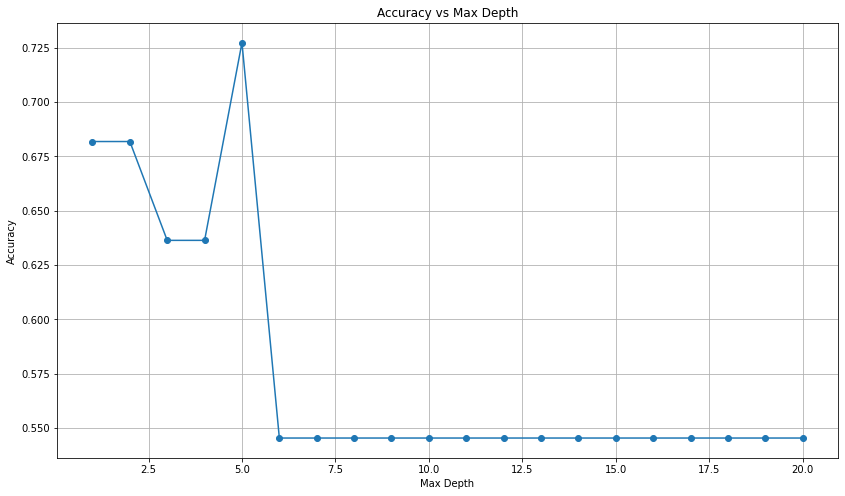

In [8]:
# Fit decision tree classifiers for max_depth values 1-20 and save accuracy scores
depths = range(1, 21)
acc_depth = []

# Compute accuracy scores for various max_depth values
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))

# Plot accuracy vs max_depth
plt.figure(figsize=(14,8))
plt.plot(depths, acc_depth, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.grid(True)
plt.show()

In [9]:
# Find the largest accuracy and the depth this occurs
best_accuracy = max(acc_depth)
best_depth = depths[acc_depth.index(best_accuracy)]
print(f"Best accuracy: {round(best_accuracy,3)*100}% at max_depth = {best_depth}")

Best accuracy: 72.7% at max_depth = 5


## Fit Decision Tree With Highest Accuracy

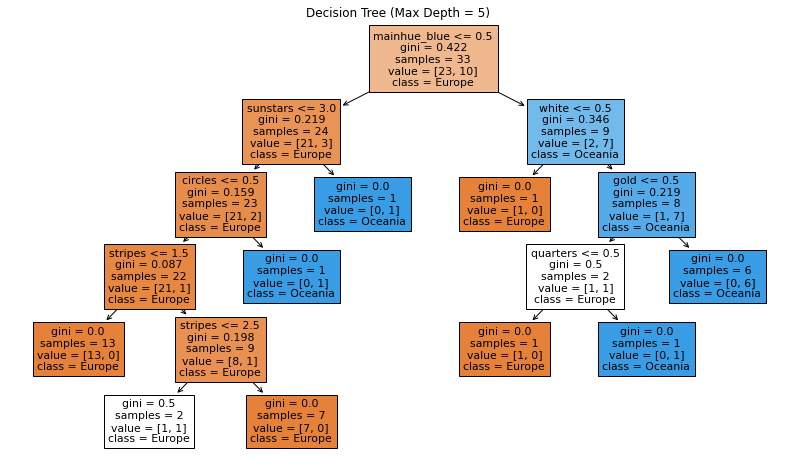

In [10]:
# Refit decision tree model with the highest accuracy and plot the decision tree
dt = DecisionTreeClassifier(random_state = 1, max_depth = best_depth)
dt.fit(train_data, train_labels)

plt.figure(figsize=(14,8))
tree.plot_tree(dt, 
               feature_names = train_data.columns,  
               class_names = ['Europe', 'Oceania'],
               filled=True)
plt.title(f'Decision Tree (Max Depth = {best_depth})')
plt.show()

## Detour: Split Criteria

In the following I will look under the hood of how the decision tree sets the split criteria using the example of "sunstars".

In [11]:
# Filter the dataset to include only samples where mainhue_blue < 0.5
filtered_data = train_data[train_data['mainhue_blue'] <= .5]

# Calculate the Gini impurity for this filtered dataset
total_samples = len(filtered_data)

## Get indices of flags that are not blue 
# Get row indices where 'mainhue_blue' <= 0.5
indices = train_data[train_data['mainhue_blue'] <= 0.5].index

# Filter train_labels using the row indices
filtered_train_labels = train_labels.loc[indices]
class_counts = filtered_train_labels.value_counts()

# Calculate gini score at node
gi = 1 - sum((count / total_samples) ** 2 for count in class_counts)

print(f'Gini Impurity for mainhue_blue < 0.5: {gi:.3f}')

Gini Impurity for mainhue_blue < 0.5: 0.219


In [12]:
# Calculate the Gini impurity for a set of labels.
def gini(labels):
    """
    Calculate the Gini impurity for a set of labels.

    Args:
    - labels: List or array-like, containing the class labels.

    Returns:
    - Gini impurity score.
    """
    total_samples = len(labels)
    class_counts = labels.value_counts()
    gini_impurity = 1.0

    for count in class_counts:
        probability = count / total_samples
        gini_impurity -= probability ** 2

    return gini_impurity


def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in the left branch, right branch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

info_gain_list = []
for i in range(0,30):
    left = train_labels[train_data['sunstars'] <= i]
    right = train_labels[train_data['sunstars'] > i]
    info_gain_list.append([i, info_gain(left, right, gini(train_labels))])
   
ig_table = pd.DataFrame(info_gain_list, columns=['split_value', 'info_gain']).sort_values('info_gain', ascending=False)
ig_table.head(20)

,split_value,info_gain
2,2,0.134005
3,3,0.134005
1,1,0.134005
0,0,0.099174
4,4,0.097153
5,5,0.062680
6,6,0.062680
7,7,0.062680
8,8,0.062680
12,12,0.030360


**Summary:** 
1 to 3 sun or star symbols in the flag offer the highest info gain. This is why the decision tree picked the threshold of 3.

Text(0, 0.5, 'info gain')

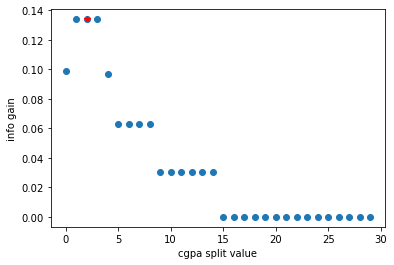

In [13]:
# Plotting the info gain by split value
plt.plot(ig_table['split_value'], ig_table['info_gain'],'o')
plt.plot(ig_table['split_value'].iloc[0], ig_table['info_gain'].iloc[0],'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')

## Pruning Decision Tree for Improved Generalization

In [14]:
## Fit decision tree models for different ccp_alpha values (pruning)
# Create a new list for the accuracy values of a pruned decision tree. 
ccp_alphas = np.logspace(-3, 0, num=20)
acc_pruned = []

#  Loop through the values of ccp and append the scores to the list
for i in ccp_alphas:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=i)
    dt_prune.fit(train_data, train_labels)
    acc_pruned.append(dt_prune.score(test_data, test_labels))

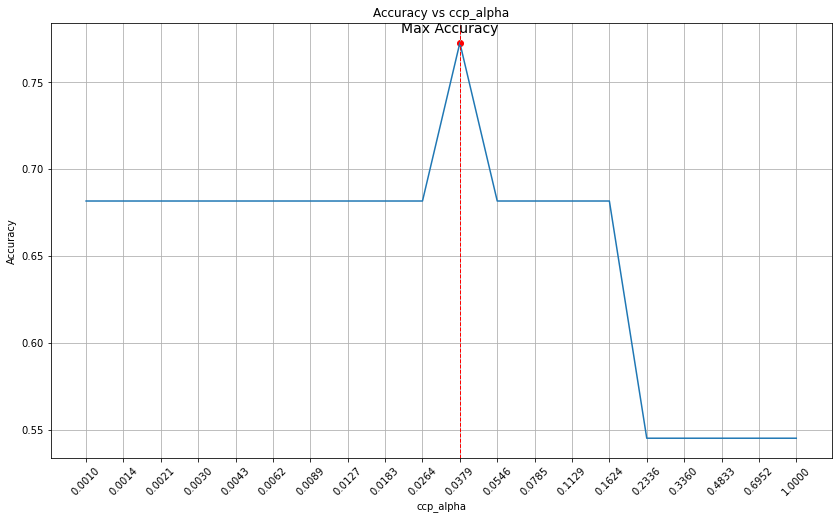

Best accuracy with pruning: 77.3% at ccp_alpha = 0.0379


In [15]:
# Find the index of the maximum accuracy score
max_accuracy_index = np.argmax(acc_pruned)
best_ccp_alpha = ccp_alphas[max_accuracy_index]
best_accuracy = acc_pruned[max_accuracy_index]

# Plot accuracy vs ccp_alpha
plt.figure(figsize=(14, 8))
plt.plot(ccp_alphas, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha')
plt.grid(True)

# Customize x-ticks with 4 decimal places
plt.xticks(ccp_alphas, ['{:0.4f}'.format(x) for x in ccp_alphas], rotation=45)
plt.minorticks_off()  # Turn off minor ticks

# Mark the highest accuracy score with a circle
plt.scatter(best_ccp_alpha, best_accuracy, c='red', marker='o')

# Draw a line connecting the point to the accuracy score
plt.annotate('Max Accuracy', (best_ccp_alpha, best_accuracy), textcoords="offset points", xytext=(-10, 10), ha='center', fontsize = 14)
plt.axvline(x=best_ccp_alpha, color='red', linestyle='--', linewidth=1)

plt.show()

# Print the largest accuracy and the ccp_alpha value this occurs
print(f"Best accuracy with pruning: {round(best_accuracy,3)*100}% at ccp_alpha = {round(best_ccp_alpha,4)}")

## Final Decision Tree

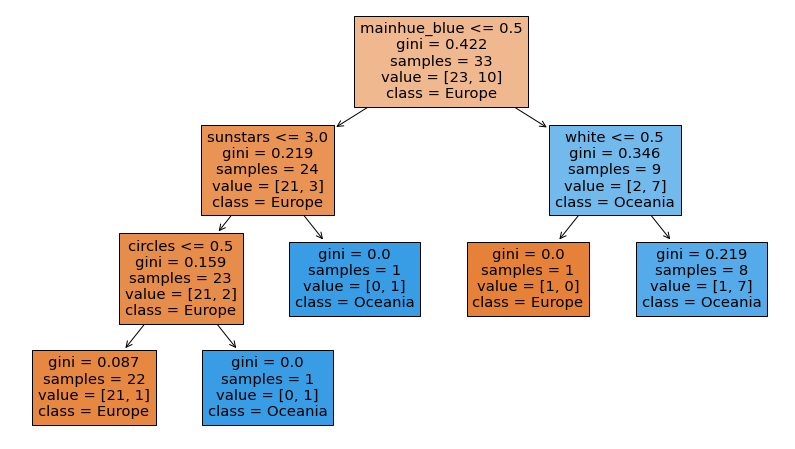

In [16]:
# Fit a decision tree model with the values for max_depth and ccp_alpha found above
dt_final = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=best_ccp_alpha)
dt_final.fit(train_data, train_labels)

# Plot the final decision tree
plt.figure(figsize=(14,8))
tree.plot_tree(dt_final, feature_names = train_data.columns, class_names = ['Europe', 'Oceania'], filled=True)
plt.show()